# Курсовая работа

## Выполнил студент группы БФИ2202 Плешаков А.С

### Задание

Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине.  
Данные в файле содержатся в следующем формате:  
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость |

Также необзодимо выполнить следующие пункты:  
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.

### Ниже представлен код програмы

In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

### Словарь, который поддерживает метод цепочек

In [8]:
class chain_hash_table:
    def __init__(self, size: int):
        self.size = size
        self.table = [None] * size
    
    def hash_function(self, key):
        if key % self.size != key:
            raise KeyError("Элемент не найден")
        else:
            return key
    
    def insert(self, key, value):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = [(key, value)]
        else:
            self.table[index].append((key, value))
    
    def search(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None:
            items = []
            for item in self.table[index]:
                items.append(item[1])
            return items
        return None  
    
    def delete(self, key):
        index = self.hash_function(key)
        if self.table[index] is not None:
            for i, item in enumerate(self.table[index]):
                if item[0] == key:
                    del self.table[index][i]
                    return
        raise KeyError("Элемент не найден")


### Методы создания и чтения даты из csv файла

In [92]:
def create_csv_file():
   data = [
      ['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу', 'Общая стоимость'],
      [1, '2024-05-15', 'Футбольный мяч', 'Спорт', 10, 25.00, 250.00],
      [2, '2024-05-15', 'Ноутбук', 'Электроника', 5, 1000.00, 5000.00],
      [3, '2024-05-16', 'Фотоаппарат', 'Электроника', 10, 300.00, 3000.00]
   ]
   
   file_name = 'orders.csv'

   with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
      csvwriter = csv.writer(csvfile)
      csvwriter.writerows(data)
   print(f'CSV файл {file_name} успешно создан.')

def read_data(file_name='orders.csv'):
   data = []
   with open(file_name, 'r', newline='', encoding='utf-8') as csvfile:
      csvreader = csv.reader(csvfile)

    # Пропускаем заголовки
      next(csvreader)
    
    # Читаем данные из файла
      for row in csvreader:
         data.append(row)

   return data

def show_csv_table():
   try:
      df = pd.read_csv('orders.csv')
      df.index = [''] * len(df['Номер заказа'])
      display(df)
   except:
      print("Проблемы с чтением фала")

create_csv_file()
show_csv_table()

CSV файл orders.csv успешно создан.


,Номер заказа,Дата заказа,Название товара,Категория товара,Количество продаж,Цена за единицу,Общая стоимость
,1,2024-05-15,Футбольный мяч,Спорт,10,25.0,250.0
,2,2024-05-15,Ноутбук,Электроника,5,1000.0,5000.0
,3,2024-05-16,Фотоаппарат,Электроника,10,300.0,3000.0


### Класс, содержащий методы работы с данными, полученными из csv файла

In [85]:
class data_service:
    def __init__(self, data: list[list]):
       self.data = data

    def calc_revenue(self) -> float:
       count = 0 
       for product in self.data:
          count += float(product[-1])
      
       return count
    
    def find_max_needed_product(self, index) -> float:
       max_selled = float(self.data[0][index])
       for product in self.data:
          max_selled = max(max_selled, float(product[index]))
          
       return max_selled
          

    def search_the_most_selled_product(self) -> list:
       max_selled = int(self.find_max_needed_product(4))
       dict = chain_hash_table(max_selled + 1)
       for product in self.data:
          max_selled = max(max_selled, int(product[4]))
          dict.insert(int(product[4]), product[2])

       return dict.search(max_selled)
    
    def search_the_most_revenue_product(self) -> list:
       max_incomest = self.find_max_needed_product(6)
       dict = chain_hash_table(int(max_incomest) + 1)
       for product in self.data:
          max_incomest = max(max_incomest, float(product[6]))
          dict.insert(int(float(product[6])), product[2])

       return dict.search(int(max_incomest))
    
    def calc_percent_of_revenue(self) -> list[str]:
       revenue = self.calc_revenue()
       percent_list = []
       for product in self.data:
          percent = (float(product[6]) / revenue) * 100
          percent_list.append(str(round(percent, 1)) + '%')
      
       return percent_list

data = read_data()
cl = data_service(data)
print(cl.calc_percent_of_revenue())  




['3.0%', '60.6%', '36.4%']


### Создание отчета

,Название товара,Количество продаж,Общая стоимость,Доля от общей прибыли,Общая прибыль
,Футбольный мяч,10,250.0,3.0%,8250.0
,Ноутбук,5,5000.0,60.6%,
,Фотоаппарат,10,3000.0,36.4%,


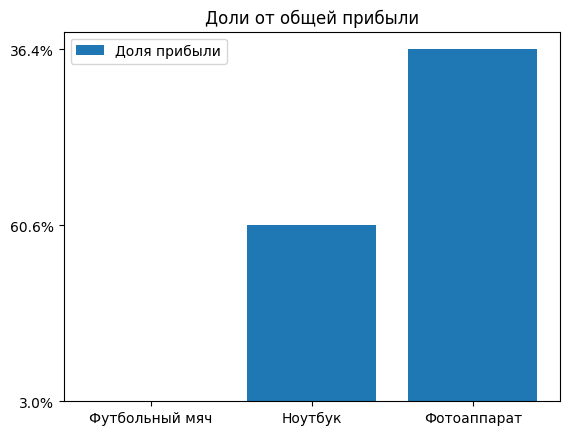

In [119]:
class visualisator:
   
    @staticmethod
    def show_report(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        revenue = csv_srvice.calc_revenue()
        percents = csv_srvice.calc_percent_of_revenue() 

        product_name = pd_data['Название товара']
        sells_count = pd_data['Количество продаж']
        cost = pd_data['Общая стоимость']

        data = {
            'Название товара': product_name,
            'Количество продаж': sells_count,
            'Общая стоимость': cost,
            'Доля от общей прибыли': percents,
            'Общая прибыль': [f'{revenue}'] + [''] * (len(percents) - 1)
        }

        df = pd.DataFrame(data)
        df.index = [''] * len(percents)

        display(df)

    def show_histogram(file: str):
        pd_data = pd.read_csv(file)
        csv_srvice = data_service(read_data(file_name=file))

        percents = csv_srvice.calc_percent_of_revenue()
        names = pd_data['Название товара']
        index = np.arange(len(names))

        plt.title('Доли от общей прибыли')
        plt.bar(index, percents, label='Доля прибыли')
        plt.xticks(index, names)
        plt.legend(loc=2)
        plt.show()

visualisator.show_report('orders.csv')
visualisator.show_histogram('orders.csv')


